In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Calling DataFrame

In [2]:
#calling the entire dataset
ds_corona=pd.read_csv("Coronavirus.csv",parse_dates=["Date"])
ds_corona

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


### Describing Info

In [3]:
#describing the info realted to the datset
ds_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


### Finding Null Values

In [4]:
#finding if there are null values
ds_corona.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

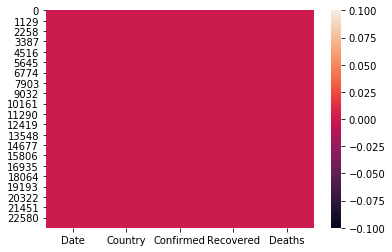

In [5]:
#plotting null values in a heatmap
sns.heatmap(ds_corona.isnull())

### Plotting Correlation

In [6]:
#plotting correlation of the variables
ds_corona.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


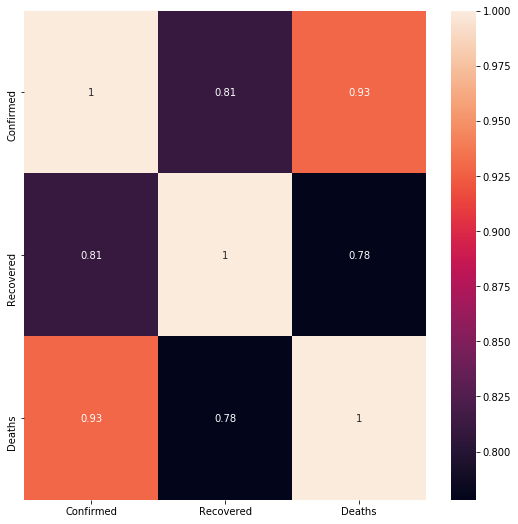

In [7]:
#plotting correlation of the variables in a heatmap 
corr_hmap=ds_corona.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Rearranging Dates

In [8]:
#breaking the dates into day,month and year  
ds_corona_dates=pd.DataFrame()
ds_corona_dates["month"]=ds_corona["Date"].dt.month_name()
ds_corona_dates["year"]=ds_corona["Date"].dt.year
ds_corona_dates["day"]=ds_corona["Date"].dt.day_name()
ds_corona_dates

,month,year,day
0,January,2020,Wednesday
1,January,2020,Wednesday
2,January,2020,Wednesday
3,January,2020,Wednesday
4,January,2020,Wednesday
...,...,...,...
23683,May,2020,Tuesday
23684,May,2020,Tuesday
23685,May,2020,Tuesday
23686,May,2020,Tuesday


### Combining Columns

In [9]:
#combining the two dataframes
ds_corona_combined=pd.concat([ds_corona_dates,ds_corona],axis=1)
ds_corona_combined

,month,year,day,Date,Country,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,2020-01-22,Afghanistan,0,0,0
1,January,2020,Wednesday,2020-01-22,Albania,0,0,0
2,January,2020,Wednesday,2020-01-22,Algeria,0,0,0
3,January,2020,Wednesday,2020-01-22,Andorra,0,0,0
4,January,2020,Wednesday,2020-01-22,Angola,0,0,0
...,...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,2020-05-26,West Bank and Gaza,429,365,3
23684,May,2020,Tuesday,2020-05-26,Western Sahara,9,6,1
23685,May,2020,Tuesday,2020-05-26,Yemen,249,10,49
23686,May,2020,Tuesday,2020-05-26,Zambia,920,336,7


### Dropping Columns

In [10]:
#dropping columns which might not be required in building the model
cols=["Date"]
ds_corona=ds_corona_combined.drop(cols,axis=1)
ds_corona

,month,year,day,Country,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,Afghanistan,0,0,0
1,January,2020,Wednesday,Albania,0,0,0
2,January,2020,Wednesday,Algeria,0,0,0
3,January,2020,Wednesday,Andorra,0,0,0
4,January,2020,Wednesday,Angola,0,0,0
...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,West Bank and Gaza,429,365,3
23684,May,2020,Tuesday,Western Sahara,9,6,1
23685,May,2020,Tuesday,Yemen,249,10,49
23686,May,2020,Tuesday,Zambia,920,336,7


### Bivariate Analysis

In [11]:
#listing the name of the countries
ds_corona["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

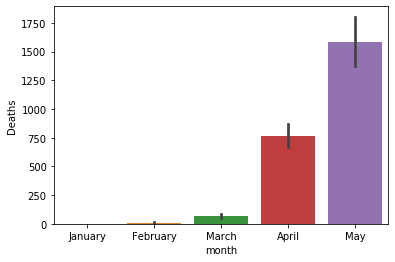

In [12]:
#plotting the number of deaths according to the months
sns.barplot(x=ds_corona["month"],y=ds_corona["Deaths"],data=ds_corona)
plt.show()

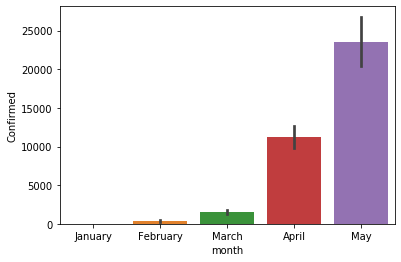

In [13]:
#plotting the number of confirmed cases according to the months
sns.barplot(x=ds_corona["month"],y=ds_corona["Confirmed"],data=ds_corona)
plt.show()

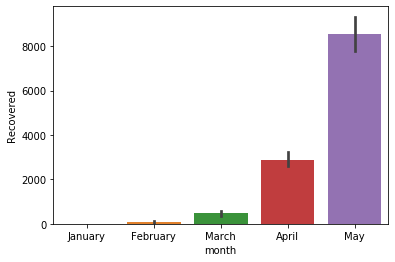

In [14]:
#plotting the number of recovered cases according to the months
sns.barplot(x=ds_corona["month"],y=ds_corona["Recovered"],data=ds_corona)
plt.show()

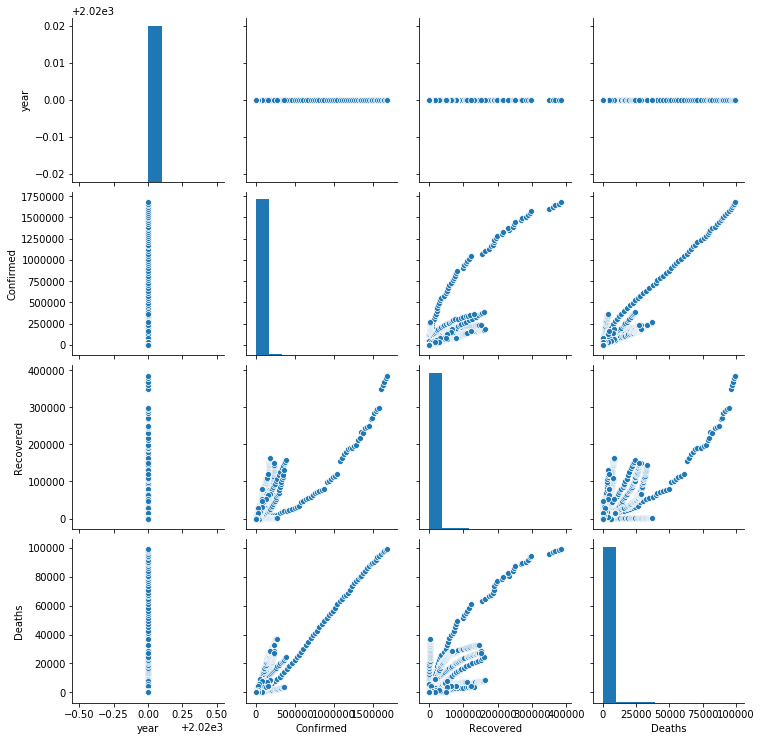

In [15]:
#plotting pairplots to find relation of all variables with one another 
sns.pairplot(ds_corona)

### Quantifying and Encoding

In [16]:
#encoding the name of the months
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds_corona["month"]=le.fit_transform(ds_corona["month"])
ds_corona

,month,year,day,Country,Confirmed,Recovered,Deaths
0,2,2020,Wednesday,Afghanistan,0,0,0
1,2,2020,Wednesday,Albania,0,0,0
2,2,2020,Wednesday,Algeria,0,0,0
3,2,2020,Wednesday,Andorra,0,0,0
4,2,2020,Wednesday,Angola,0,0,0
...,...,...,...,...,...,...,...
23683,4,2020,Tuesday,West Bank and Gaza,429,365,3
23684,4,2020,Tuesday,Western Sahara,9,6,1
23685,4,2020,Tuesday,Yemen,249,10,49
23686,4,2020,Tuesday,Zambia,920,336,7


### Dropping Columns

In [17]:
#droppping the columns that will not be consider in the final model 
cols=["year","day","Country"]
ds_corona=ds_corona.drop(cols,axis=1)
ds_corona

,month,Confirmed,Recovered,Deaths
0,2,0,0,0
1,2,0,0,0
2,2,0,0,0
3,2,0,0,0
4,2,0,0,0
...,...,...,...,...
23683,4,429,365,3
23684,4,9,6,1
23685,4,249,10,49
23686,4,920,336,7


### Seperating Target and Input Variable

In [18]:
#seperating the input variable
x=ds_corona.iloc[:,[0,1,2]]
x

,month,Confirmed,Recovered
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0
...,...,...,...
23683,4,429,365
23684,4,9,6
23685,4,249,10
23686,4,920,336


In [19]:
#seperating the target variable
y=ds_corona.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

### Scaling Input Variable

In [20]:
#scaling the input varibale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.03173404, -0.13641539, -0.17049719],
       [ 0.03173404, -0.13641539, -0.17049719],
       [ 0.03173404, -0.13641539, -0.17049719],
       ...,
       [ 1.36456375, -0.13215314, -0.16983681],
       [ 1.36456375, -0.12066732, -0.1483084 ],
       [ 1.36456375, -0.13545681, -0.16884624]])

### Importing Regression Algoritims and Metrices

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Putting Aliases

In [30]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge(alpha=2)
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=63)
ABR=AdaBoostRegressor(random_state=63)
RFR=RandomForestRegressor(random_state=63)
GBR=GradientBoostingRegressor(random_state=63)

### Appending Models

In [31]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

### Machine Learning

In [32]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.9244070296373189
Mean_Squared_Error = 1827516.8121184022
Cross_Val_Score =  0.053408795737558065


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.9244159981615677
Mean_Squared_Error = 1827299.9913113096
Cross_Val_Score =  0.05492152477848179


********************************* Ridge *********************************

 Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
R2_score =  0.9244140081616288
Mean_Squared_Error = 1827348.101053884
Cross_Val_Score =  0.053596045779459436


****************

### Algorithim Compare Table

In [33]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.924407,1827516.812,0.053
1,Lasso,0.924416,1827299.991,0.055
2,Ridge,0.924414,1827348.101,0.054
3,ElasticNet,0.837150,3937028.319,-3.561
4,DecisionTreeRegressor,0.978680,515416.036,-0.265
5,KNeighborsRegressor,0.985402,352923.089,0.632
6,AdaBoostRegressor,0.943163,1374080.570,-0.758
7,RandomForestRegressor,0.987946,291416.630,0.350
8,GradientBoostingRegressor,0.974075,626747.266,0.461


### Generating Best Random State for Random Forest Regressor

In [34]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    RFR.fit(x_train,y_train)
    y_pred=RFR.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random_state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr    
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random_state: 42 is: 0.9881355629599993
r2_score corresponding to random_state: 43 is: 0.9787898113404891
r2_score corresponding to random_state: 44 is: 0.9768039637666601
r2_score corresponding to random_state: 45 is: 0.9863252267789107
r2_score corresponding to random_state: 46 is: 0.9768780113243519
r2_score corresponding to random_state: 47 is: 0.9818785295426415
r2_score corresponding to random_state: 48 is: 0.9751795163689789
r2_score corresponding to random_state: 49 is: 0.9832780377541249
r2_score corresponding to random_state: 50 is: 0.9871283473828638
r2_score corresponding to random_state: 51 is: 0.9905919110603525
r2_score corresponding to random_state: 52 is: 0.9789531819884549
r2_score corresponding to random_state: 53 is: 0.9781792025328875
r2_score corresponding to random_state: 54 is: 0.9870801962824777
r2_score corresponding to random_state: 55 is: 0.9871014634683772
r2_score corresponding to random_state: 56 is: 0.9771479659218719
r2_score c

### Re-Testing using best Random State

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=.20)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
print("r2 score is :",(r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean_Absolute_Error is :",mean_absolute_error(y_test,y_pred))

r2 score is : 0.9913502225358489
RMSE is : 465.5415005984383
Mean_Absolute_Error is : 78.91787233076631


### HyperParameter Tuning Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
parameterRFR=parameterRFR={"n_estimators":[10,20,30,40,50,100,200],
            "max_features":["auto","sqrt","log2"],
            "max_depth":[2,3,4,5,None],
            "min_samples_split":[2,3,4],
            "min_samples_leaf":[ 2,3,4],
            "bootstrap":[True, False],}
gridRFR=GridSearchCV(RFR,param_grid=parameterRFR,n_jobs=-1,cv=10)
gridRFR.fit(x_train,y_train)
gridRFR.best_score_,gridRFC.best_params_

### Saving the model

In [26]:
import joblib
joblib.dump(RFR,"Model_Corona_RFR.csv")

['Model_Corona_re.obj']

### Loading the Model

In [27]:
Model_Corona=joblib.load("Model_Corona_RFR.csv")

### Using the Model

In [28]:
Model_Corona.predict(x_test)

array([3.76207424e+00, 2.54435017e+00, 5.39090890e+01, ...,
       3.66542926e+00, 2.04906470e+03, 9.02460365e-01])